## Choice of the dataset:
Here i decided to go with the dataset of India's GDP from 1960 to 2024

#### Justification:
1. It has a clear non-linear trend, as any countries economy would not at all follow a linear trend.
2. The relationship between Time and GDP is easy to understand.
3. It is a good fit for the sigmoid function.

## Code

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("/content/India_GDP_Data.csv")
print(df.head())


   Year  GDP_In_Billion_USD  Per_Capita_in_USD  Percentage_Growth 
0  2021             3173.40               2277                8.95
1  2020             2667.69               1933               -6.60
2  2019             2831.55               2072                3.74
3  2018             2702.93               1998                6.45
4  2017             2651.47               1981                6.80


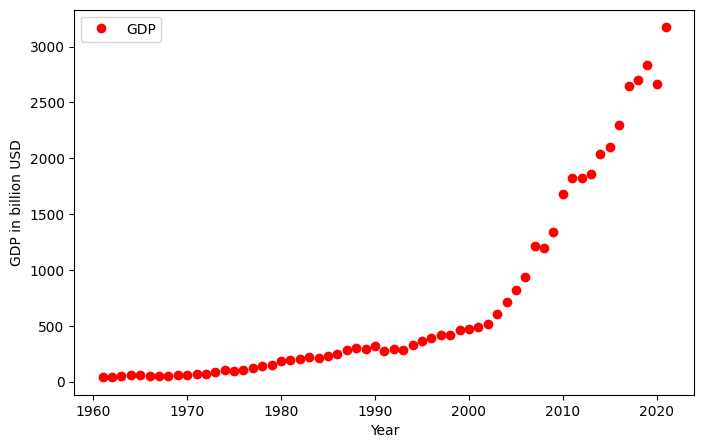

In [ ]:
plt.figure(figsize=(8,5))
x,y=(df["Year"].values, df['GDP_In_Billion_USD'].values)
plt.plot(x,y,'ro',label="GDP")
plt.xlabel("Year")
plt.ylabel("GDP in billion USD")
plt.legend()
plt.show()

Based on the visuals of this curve, we can clearly say this is a non linear problem as a linear regression would compleletly miss on to the spike in GDP after the year 2000.
This plot also shows us that the sigmoid curve would work really good here.


---



Now, there is no specific library as such which contains non-linear approaches on a whole.   
This is primarily because a non-linear problem has infinitely many approaches and they cannot be put onto or be fitted into a single library or functionality.  
Therefore we use scipy.optimize module to perform non-linear regression approaaches.

In [ ]:
#We first define our sigmoid function.
def sigmoid(x,L,k,x0):
  y = L/(1+np.exp(-k*(x-x0)))
  return y
#normalizing the data
x=(df["Year"].values-df["Year"].min())/(df["Year"].max()-df["Year"].min())
y=(df['GDP_In_Billion_USD'].values-df['GDP_In_Billion_USD'].min())/(df['GDP_In_Billion_USD'].max()-df['GDP_In_Billion_USD'].min())

In [ ]:
from scipy.optimize import curve_fit
popt,pcov=curve_fit(sigmoid,x,y)

print("L=",popt[0])
print("k=",popt[1])
print("x0=",popt[2])

L= 1.6024787803896992
k= 7.396643674824569
x0= 0.939963134132809


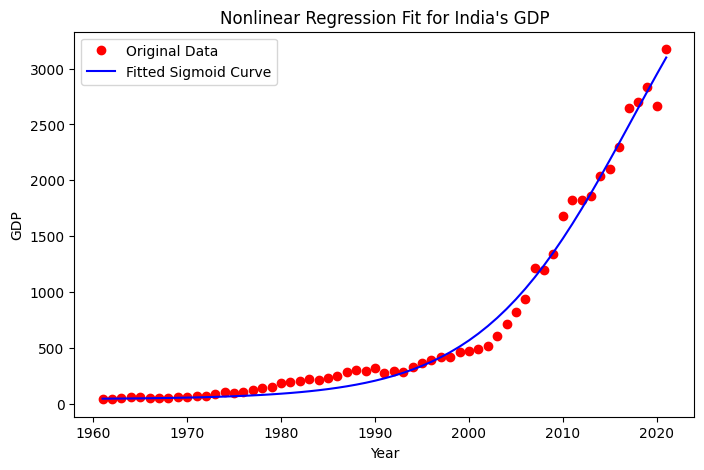

In [ ]:
# Plot the resulting regression line
# x = np.linspace(1960, 2024, 55) # This was creating an x array of a different length

# Normalize x to be used with the model
x_norm = (df["Year"].values-df["Year"].min())/(df["Year"].max()-df["Year"].min()) # Use the original normalized x

# Generate y values from the fitted model
y_fit = sigmoid(x_norm, *popt)

# Denormalize y to plot it on the original scale
y_fit_denormalized = y_fit * (df['GDP_In_Billion_USD'].values.max()-df['GDP_In_Billion_USD'].values.min()) + df['GDP_In_Billion_USD'].values.min() # Denormalize the fitted y values

# Plot the original data and the fitted curve
plt.figure(figsize=(8, 5))
plt.plot(df["Year"].values, df['GDP_In_Billion_USD'].values, 'ro', label='Original Data') # Use the original x and y for plotting original data
plt.plot(df["Year"].values, y_fit_denormalized, 'b-', label='Fitted Sigmoid Curve') # Use the original x and denormalized fitted y for plotting the curve
plt.ylabel('GDP')
plt.xlabel('Year')
plt.title('Nonlinear Regression Fit for India\'s GDP') # Corrected title
plt.legend()
plt.show()